In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))


def z(theta, x):
    assert theta.shape[1] == 1
    assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
    return np.dot(x, theta)


def hypothesis(theta, x):
    return sigmoid(z(theta, x))


def cost(theta, x, y):
    assert x.shape[1] == theta.shape[0]  # x has a column for each feature, theta has a row for each feature.
    assert x.shape[0] == y.shape[0]  # One row per sample.
    assert y.shape[1] == 1
    assert theta.shape[1] == 1
    h = hypothesis(theta, x)
    one_case = np.matmul(-y.T, np.log(h))
    zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
    return (one_case + zero_case) / len(x)


def gradient_descent(theta, x, y, learning_rate, regularization = 0):
    regularization = theta * regularization
    error = hypothesis(theta, x) - y
    n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
    return theta - n


def minimize(theta, x, y, iterations, learning_rate, regularization = 0):
    costs = []
    for _ in range(iterations):
        theta = gradient_descent(theta, x, y, learning_rate, regularization)
        costs.append(cost(theta, x, y)[0][0])
    return theta, costs

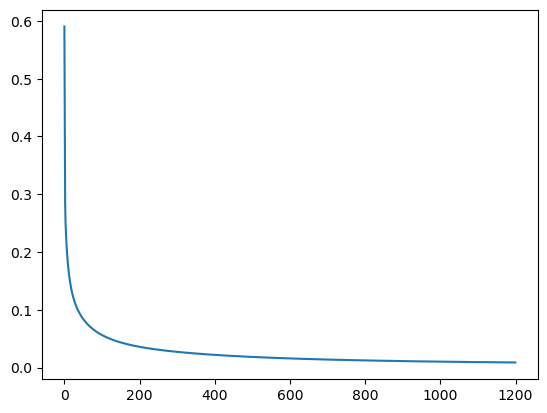

0.008697856305831224


1.0

In [10]:
mushroom_data = pd.read_csv("C:\\Users\\Gaurav Mukherjee\\Documents\\Machine Learning\\mushrooms.csv")
mushroom_x = pd.get_dummies(mushroom_data.drop('class', axis=1))
mushroom_x['bias'] = 1
mushroom_x = mushroom_x.values
mushroom_y = (np.atleast_2d(mushroom_data['class']).T == 'p').astype(int)

x_train, x_test, y_train, y_test = train_test_split(mushroom_x, mushroom_y, train_size=0.85, test_size=0.15)
candidate = np.atleast_2d([ np.random.uniform(-1, 1, 118) ]).T
theta, costs = minimize(candidate, x_train, y_train, 1200, 1.2, 0.5)
plt.plot(range(len(costs)), costs)
plt.show()
print(costs[-1])

predictions = x_test.dot(theta) > 0
len(list(filter(lambda x: x[0] == x[1], np.dstack((predictions, y_test))[:,0]))) / len(predictions)